## 1.a sinewave

In [29]:
import numpy as np

def sinewave(t, f=1.0, d=0.0):
    if type==list:
        y = []
        for ti in t:
            y.append(np.sin(2 * np.pi * f * (ti - d) + np.pi * d))
        return t
    else:
        return np.sin(2 * np.pi * f * (t - d) + np.pi * d)

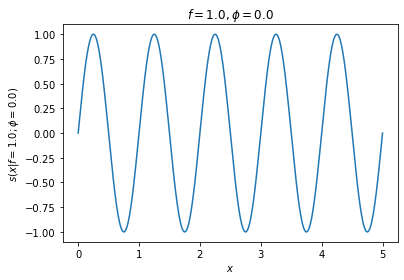

In [30]:
##example 
import matplotlib.pyplot as plt
f=1.0 
d=0.0
x = np.linspace(0,5, 1000)
y = sinewave(x, f=f, d=d)

plt.title(rf"$f={f}, \phi={d}$")
plt.xlabel(r"$x$")
plt.ylabel(rf"$s(x| f={f}; \phi={d})$")
plt.plot(x, y)
plt.show()

## 1.b gabor

In [31]:
import numpy as np
import math

def gabor(t, a=1.0, Sigma=1.0, f=1.0, d=0.0):
    return a * np.exp(-math.pow(t / Sigma, 2) / 2) * np.cos(2 * np.pi * f * t + 2 * np.pi * d)

def gabore(t, a=1.0, Sigma=1.0, f=1.0):
    return gabor(t, a=a, Sigma=Sigma, f=f, d=0)

def gaboro(t, a=1.0, Sigma=1.0, f=1.0):
    return gabor(t, a=a, Sigma=Sigma, f=f, d=0.25)

def gabor_norm(fs=1,Sigma=1.0, f=1.0, d=0.0):
    temp=0
    for t in range(int(fs / f)):
        temp=temp + math.pow(gabor(t, a=1, Sigma=Sigma, f=f, d=d), 2)
    return np.sqrt(temp)

def gabore_norm(fs=1, Sigma=1.0, f=1.0):
    return gabor_norm(fs=fs, Sigma=Sigma, f=f, d=0)

def gaboro_norm(fs=1,  Sigma=1.0, f=1.0):
    return gabor_norm(fs=fs, Sigma=Sigma, f=f, d=0.25)


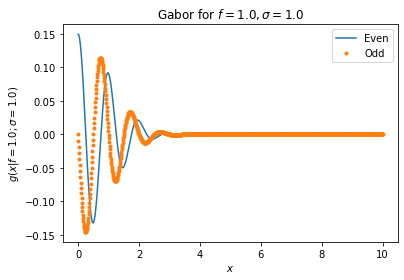

In [32]:
#example 
import matplotlib.pyplot as plt

def norm(foo, x, **kwargs):
    temp = math.sqrt(sum([foo(xi, **kwargs) * foo(xi, **kwargs)  for xi in x]))
    return [foo(xi, **kwargs) /temp for xi in x]

fs=1 
Sigma=1.0
f=1.0
plt.title(rf"Gabor for $f={f}, \sigma={Sigma}$")
plt.xlabel(r"$x$")
plt.ylabel(rf"$g(x| f={f}; \sigma={Sigma})$")
x = np.linspace(0,10, 1000)

y = norm(gabore, x, Sigma=Sigma, f=f)
plt.plot(x, y,'-')

y = norm(gaboro, x, Sigma=Sigma, f=f)
plt.plot(x, y,'.')

plt.legend(["Even", "Odd"])
plt.show()


## 1.c gammatone

In [33]:
import numpy as np
import math
def gammatone(t, f, phi, n, a):
    b = 1.019 * 24.7 * (4.37 * (f/1000) + 1)
    return a*np.power(t, n-1) * np.power(np.e, -2*np.pi*b*t) * np.cos(2*np.pi*f*t + phi)


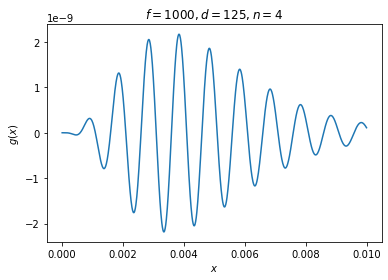

In [34]:
#example 
f=1000 
d=125
phi=1.0
n=4
a=1
plt.title(rf"$f={f}, d={d},n={4}$")
plt.xlabel(r"$x$")
plt.ylabel(rf"$g(x)$")
x = np.linspace(0,0.01, 1000)
y = gammatone(x, f=f, phi=phi, n=n, a=a)
plt.plot(x, y)
plt.show()

## 2.a localmaxima

In [35]:
def local_maxima(arr):
    maxima = []
    for i in range(1, len(arr)-1):
        if arr[i] > arr[i+1] and arr[i] > arr[i-1]:
            maxima.append(i)
    return maxima

In [36]:
#example 
local_maxima([1,3,2,-2,2,4,8,6])

[1, 6]

## 2.b crossings

In [37]:
def crossings(arr, threshold, direction):
    crossing = []
    for i in range(1, len(arr)):
        if direction == "negpos":
            if arr[i] >= threshold and arr[i-1] < threshold:
                crossing.append(i)
        elif direction == "posneg":
            if arr[i] < threshold and arr[i-1] >= threshold:
                crossing.append(i)
        elif direction == "both":
            if (arr[i] >= threshold and arr[i-1] < threshold) or (arr[i] < threshold and arr[i-1] >= threshold):
                crossing.append(i)
    return crossing

In [38]:
#example 
crossings([-1,0,1,2,0,-2],threshold=1,direction="both")

[2, 4]

## 2.c envelope

In [39]:
import numpy as np

def envelope(y, nblocks=1):
    block_size = int(len(y) /nblocks)
    blockindices = np.arange(0, len(y), block_size)
    blocks = np.split(y, blockindices[1:])
    ylower=[]
    yupper=[]
    for block in blocks:            
        ylower.append(np.min(block))
        yupper.append(np.max(block))
    return ylower, yupper, blockindices

In [40]:
#example 
ylower, yupper, blockindices = envelope([5,5,2,3,4,3,-6,-9,0,-3,9,-7],3)

In [41]:
ylower

[2, -9, -7]

In [42]:
yupper

[5, 4, 9]

In [43]:
blockindices

array([0, 4, 8])